In [1]:
import pandas as pd

import numpy as np


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate



from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV


import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score

import numpy as np;
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'imblearn'

In [11]:
df_tri=pd.read_csv('train.csv')

In [12]:
df_tri.head(2)

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,1,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.2131,2.2554,...,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,2,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.5089,0.9788,...,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0


In [13]:
df_tei=pd.read_csv('test.csv')

In [14]:
df_tei.head(2)

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,36554,0.20055,0.37951,0.396410,2.0472,32.351,0.38825,0.249760,1.33050,1.1389,...,348690.0000,0.12196,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,36555,0.00902,0.63202,0.053735,1.1263,-37.842,0.00000,0.014434,0.58223,1.3332,...,1.1263,0.18011,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.5603


In [15]:
df_tri['target'].value_counts()

0    29772
1     1511
Name: target, dtype: int64

#### OBSERVATION: As we can see here this is highly imbalance dataset: 

In [16]:
yees=df_tr['target']
df_tr_after_drop=df_tr.drop(['target'],axis=1)

# Splitting DATA into Train Test and C.V with stratification in 49:30:21 ratio:

In [17]:
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=42,stratify=yees)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)


### Replacing NaN  with mean value of feature:

In [18]:
X_tr.fillna(X_tr.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)


C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Standardisation of data:

In [27]:
sc = StandardScaler(with_mean=True)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.transform(X_cv)

df_tei1 = sc.fit_transform(df_tei)
df_tri1 = sc.transform(df_tr_after_drop)

# HYPER_PARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATORS OF RANDOM FOREST:

In [35]:
#code for hyperparameter tuning
import numpy as np
#Estimators
hyper1 =  [5, 10, 50, 100, 200, 500, 1000]
#Depth
hyper2 =  [2, 3, 4, 5, 6, 7, 8, 9, 10]

auc1=np.empty((7,9))
auc2=np.empty((7,9))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = RandomForestClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

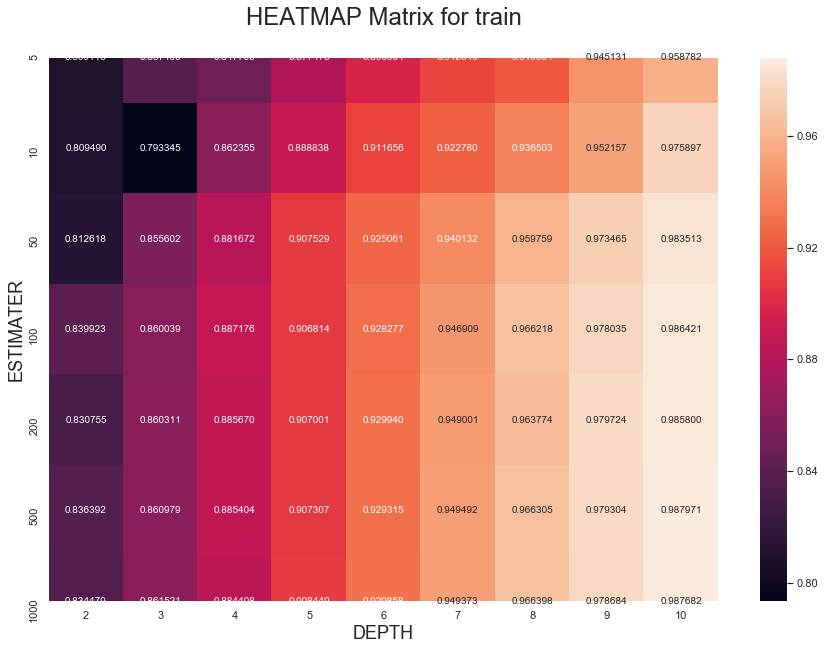

In [38]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

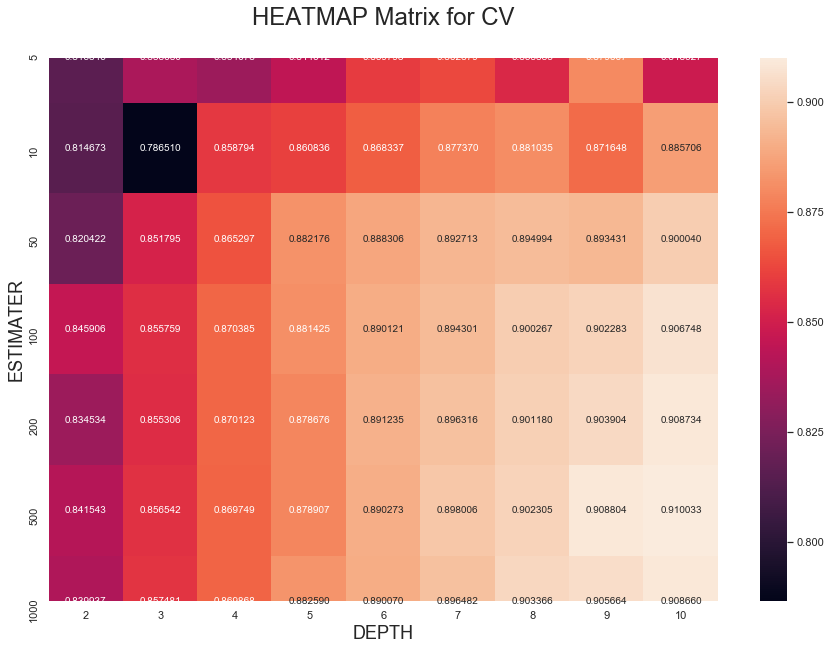

In [39]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [47]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (50,5, acc))


f1 = f1_score(y_test, pred)
print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,5,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,5,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,5,f1))



The accuracy of the Random forest classifier for n_estimaters=50.000000 and Depth = 5.000000 is 96.185402%

The precision_score of the  Random forest classifier  for n_estimaters=50 and Depth = 5 is 0.970297

The recall_score of the  Random forest classifier  for n_estimaters=50 and Depth = 5 is 0.216336

The f1_score of the  Random forest classifier  for n_estimaters=50 and Depth = 5 is 0.353791


# PLOTTING CONFUSION MATRIX:

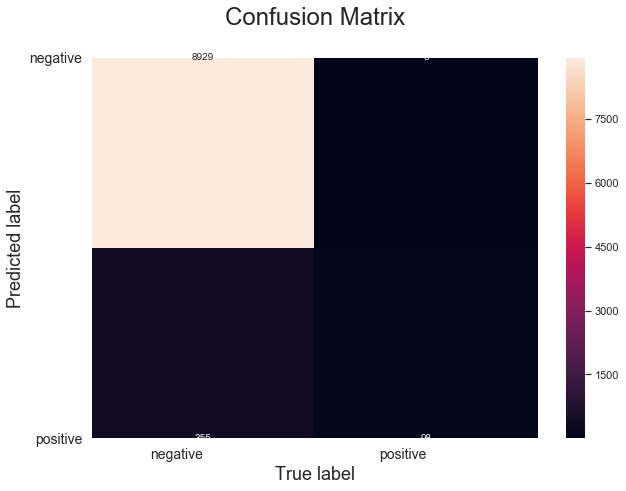

In [48]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA:

In [49]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

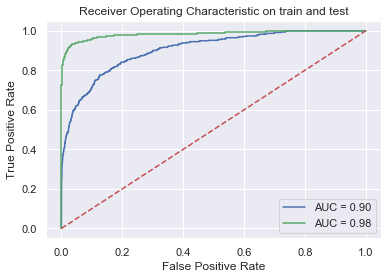

In [50]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# HYPERPARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATORS for          XGBClassifier

In [52]:
#code for hyperparameter tuning
import numpy as np
#Estimators
hyper1 =  [5, 10, 50, 100, 200, 500, 1000]
#Depth
hyper2 =  [2, 3, 4, 5, 6, 7, 8, 9, 10]

auc1=np.empty((7,9))
auc2=np.empty((7,9))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = XGBClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

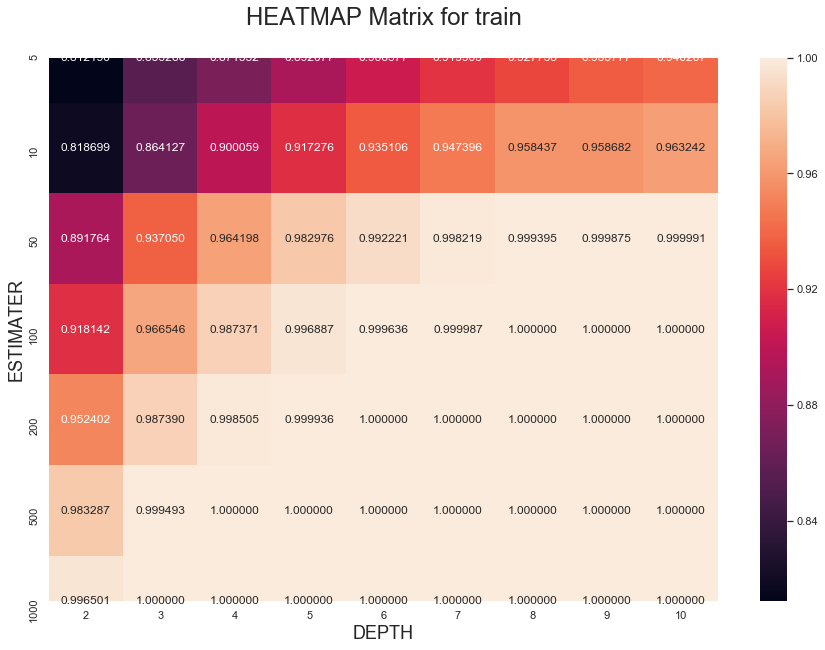

In [53]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

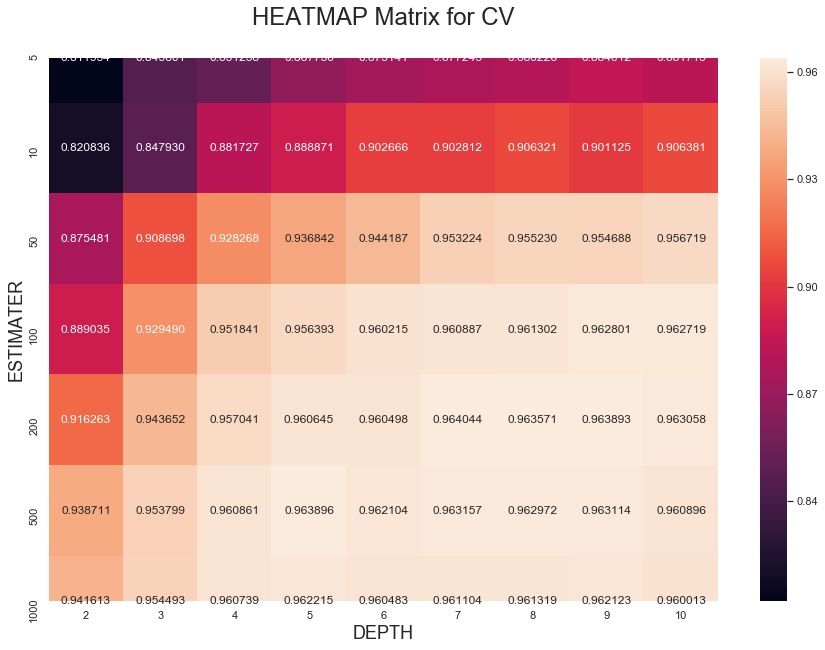

In [54]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [60]:
rf = RandomForestClassifier(n_estimators=150,max_depth=10)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (150,10, acc))


#f1 = f1_score(y_test, pred)
print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (150,10,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (150,10,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (150,10,f1))



The accuracy of the Random forest classifier for n_estimaters=150.000000 and Depth = 10.000000 is 96.228023%

The precision_score of the  Random forest classifier  for n_estimaters=150 and Depth = 10 is 0.962617

The recall_score of the  Random forest classifier  for n_estimaters=150 and Depth = 10 is 0.227373

The f1_score of the  Random forest classifier  for n_estimaters=150 and Depth = 10 is 0.367857


# PLOTTING CONFUSION MATRIX:

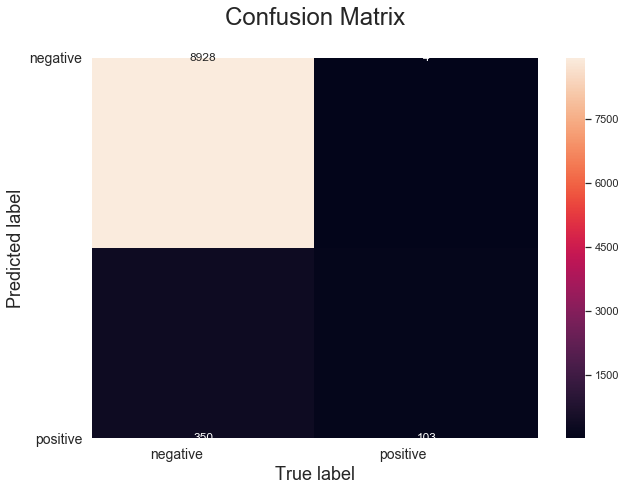

In [61]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA

In [62]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

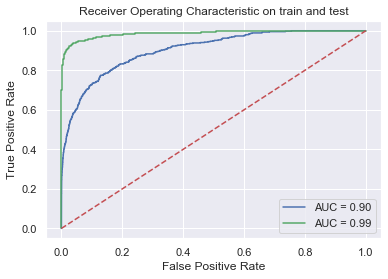

In [63]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  SMOTE 

In [72]:
df_tr=pd.read_csv('train.csv')
yees=df_tr['target']
df_tr_after_drop=df_tr.drop(['target'],axis=1)
#spilliting data 


# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=42,stratify=yees)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

X_tr.fillna(X_tr.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)


sm = SMOTE(random_state=27, ratio=1.0)

X_tr, y_tr = sm.fit_sample(X_tr, y_tr)

sc = StandardScaler(with_mean=True)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.transform(X_cv)

### HYPER_PARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATERS OF DECISION TREE:

In [ ]:
#code for hyperparameter tuning
import numpy as np
hyper1 =  [5, 10, 50, 100, 200, 500, 1000]
hyper2 =  [2, 3, 4, 5, 6, 7, 8, 9, 10]

auc1=np.empty((7,9))
auc2=np.empty((7,9))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = RandomForestClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

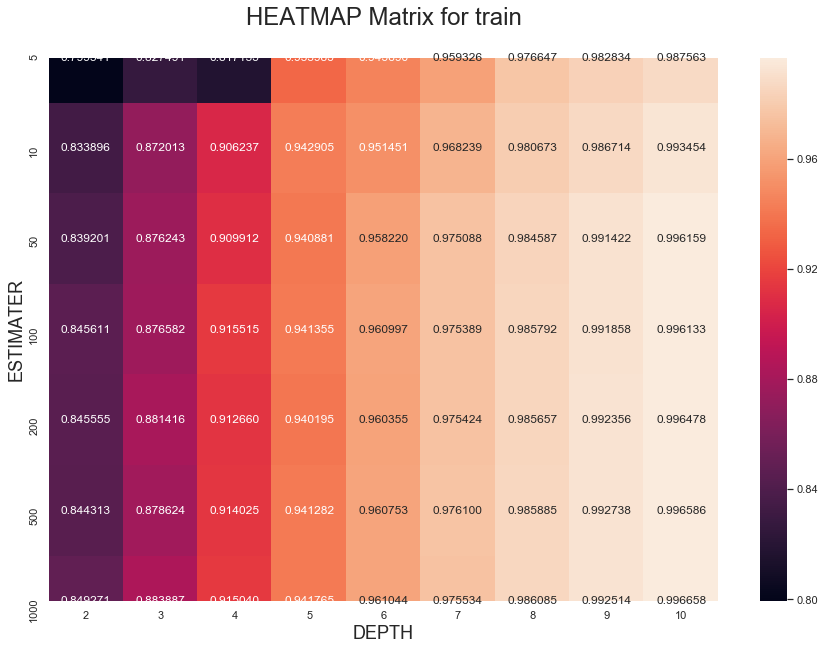

In [67]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

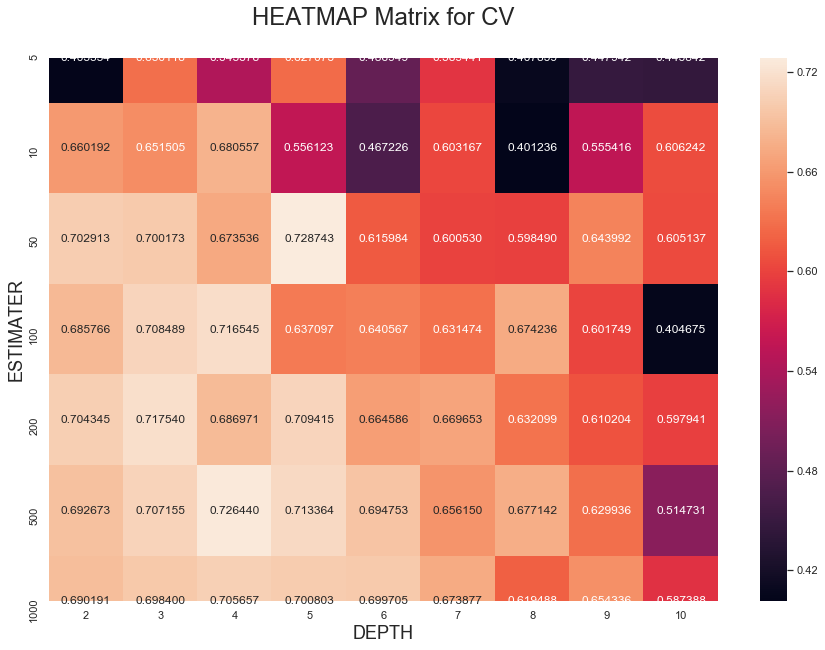

In [68]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [156]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (100,10, acc))


f1 = f1_score(y_test, pred)
print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,10,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,10,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,10,f1))



The accuracy of the Random forest classifier for n_estimaters=100.000000 and Depth = 10.000000 is 90.495471%

The precision_score of the  Random forest classifier  for n_estimaters=100 and Depth = 10 is 0.276249

The recall_score of the  Random forest classifier  for n_estimaters=100 and Depth = 10 is 0.598234

The f1_score of the  Random forest classifier  for n_estimaters=100 and Depth = 10 is 0.377964


# PLOTTING CONFUSION MATRIX:

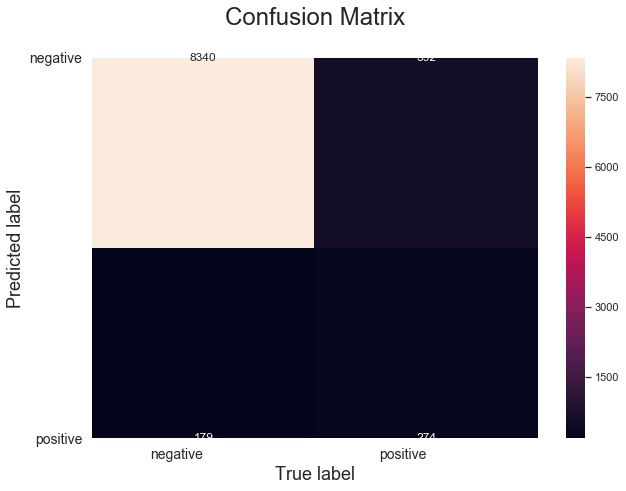

In [97]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA:

In [98]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

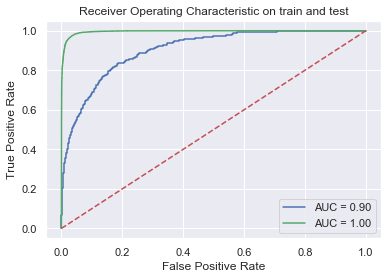

In [99]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# HYPERPARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATERS for XGBClassifier

In [88]:
#code for hyperparameter tuning
import numpy as np
hyper1 =  [5, 10, 50, 100]
hyper2 =  [ 6,  8,  10, 12]

auc1=np.empty((4,4))
auc2=np.empty((4,4))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = XGBClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

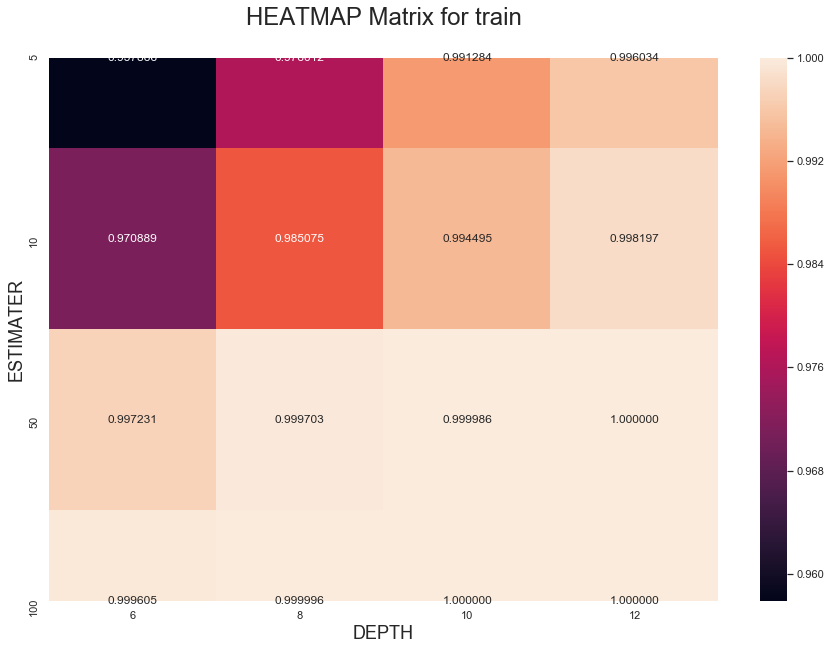

In [89]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

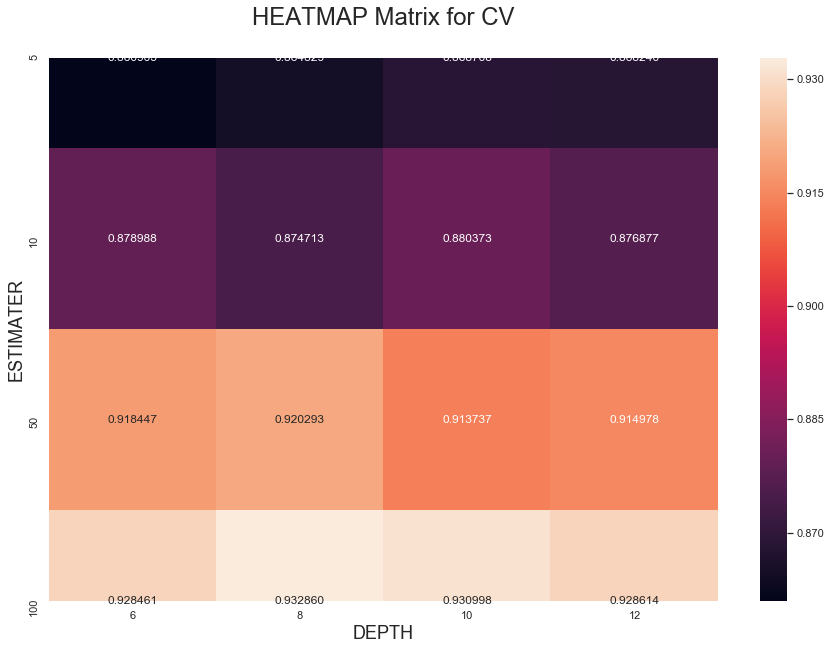

In [90]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [103]:
rf = RandomForestClassifier(n_estimators=100,max_depth=8)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

f1 = f1_score(y_test, pred)

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (100,8, acc))



print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,8,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,8,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,8,f1))



The accuracy of the Random forest classifier for n_estimaters=100.000000 and Depth = 8.000000 is 89.206180%

The precision_score of the  Random forest classifier  for n_estimaters=100 and Depth = 8 is 0.259450

The recall_score of the  Random forest classifier  for n_estimaters=100 and Depth = 8 is 0.666667

The f1_score of the  Random forest classifier  for n_estimaters=100 and Depth = 8 is 0.373531


# PLOTTING CONFUSION MATRIX:

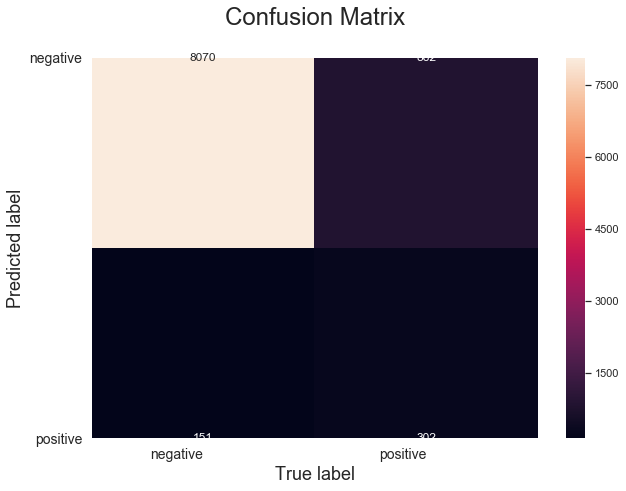

In [104]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA:

In [105]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

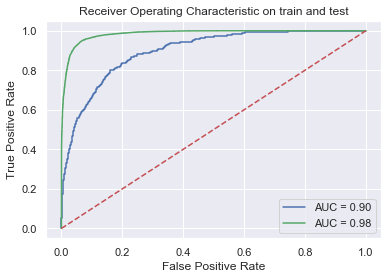

In [106]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# UP-SAMPLING TECHNIQUE:

In [107]:
#spilliting data 


from sklearn.model_selection import train_test_split

# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=42,stratify=yees)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)



In [108]:
y_tr = pd.DataFrame(y_tr)
X_tr = pd.DataFrame(X_tr)
X_tr['target']=y_tr['target']
X_tr.head(2)

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
603,604,-0.108510,1.03670,-0.218240,0.11721,-203.670,-0.073490,-0.108510,-0.035385,0.34733,...,-0.320380,2.95820,1.30960,-21.52100,36.663,900.500,259.800,1.4049,0.3577,0
15404,15405,0.039653,0.76787,-0.074542,0.89126,-10.855,0.091344,0.049174,0.269970,1.01430,...,0.014138,0.19128,0.98586,0.39738,135.800,11.557,63.946,5.7080,10.0570,0


<class 'pandas.core.frame.DataFrame'>
14587 741
14587 741
Random over-sampling:
1    14587
0    14587
Name: target, dtype: int64


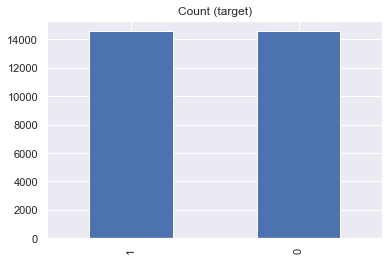

In [109]:
# Class count
X_tr = pd.DataFrame(X_tr)
print(type(X_tr))
count_class_0, count_class_1 = X_tr.target.value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = X_tr[X_tr.target == 0]
df_class_1 = X_tr[X_tr.target == 1]
print(count_class_0, count_class_1)


df_class_1_over = df_class_1.sample(count_class_0, replace=True)
X_tr = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(X_tr.target.value_counts())

X_tr.target.value_counts().plot(kind='bar', title='Count (target)');

In [110]:
y_tr=X_tr['target']
X_tr=X_tr.drop(['target'],axis=1)

In [113]:
X_tr.fillna(X_tr.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)


sc = StandardScaler(with_mean=True)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.transform(X_cv)



# HYPERPARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATERS for XGBClassifier

In [114]:
#code for hyperparameter tuning
import numpy as np
hyper1 =  [5, 10, 50, 100, 200, 500]
hyper2 =  [2, 4, 6, 8, 10,12]

auc1=np.empty((6,6))
auc2=np.empty((6,6))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = XGBClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

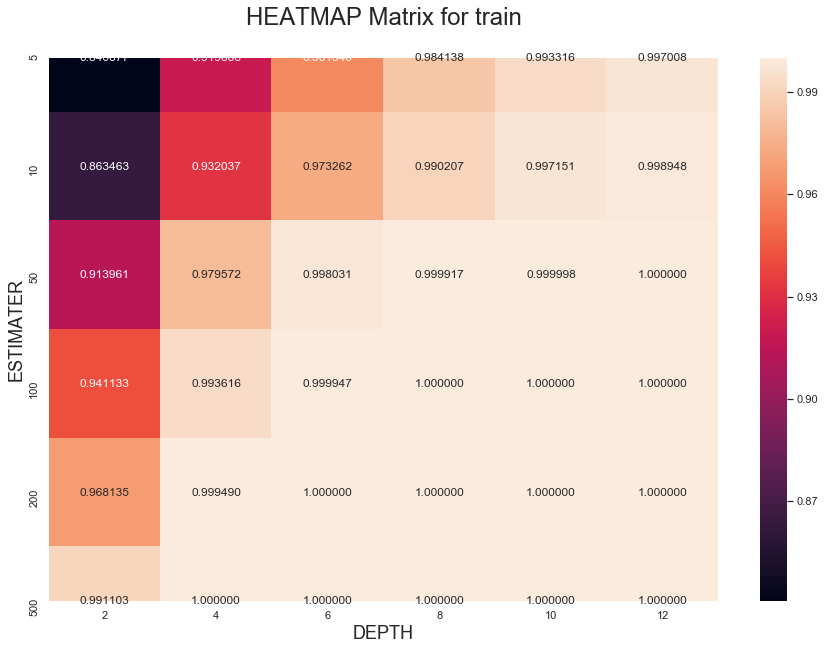

In [115]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

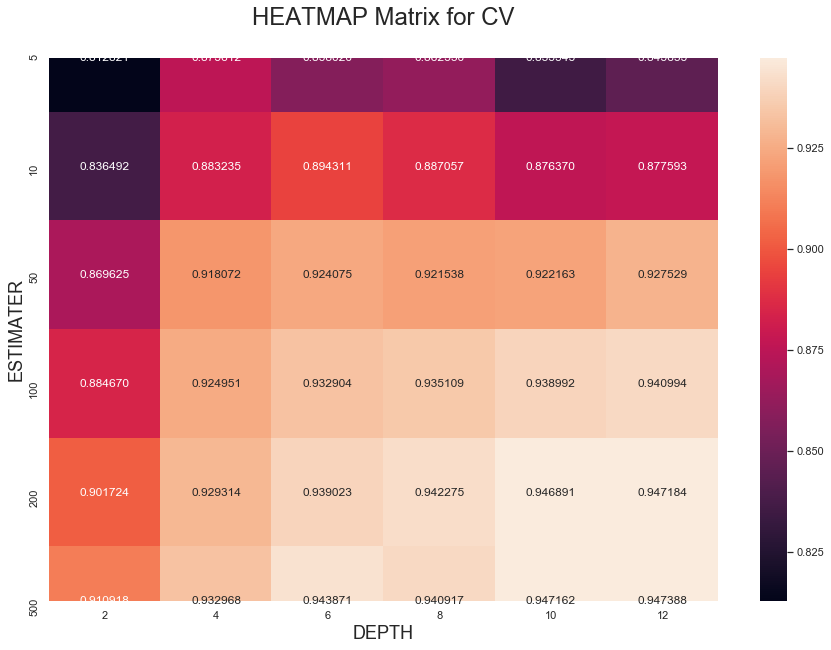

In [116]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [118]:
rf = RandomForestClassifier(n_estimators=200,max_depth=8)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

f1 = f1_score(y_test, pred)

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (50,6, acc))



print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,6,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,6,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,6,f1))



The accuracy of the Random forest classifier for n_estimaters=50.000000 and Depth = 6.000000 is 90.111881%

The precision_score of the  Random forest classifier  for n_estimaters=50 and Depth = 6 is 0.269193

The recall_score of the  Random forest classifier  for n_estimaters=50 and Depth = 6 is 0.611479

The f1_score of the  Random forest classifier  for n_estimaters=50 and Depth = 6 is 0.373819


# PLOTTING CONFUSION MATRIX:

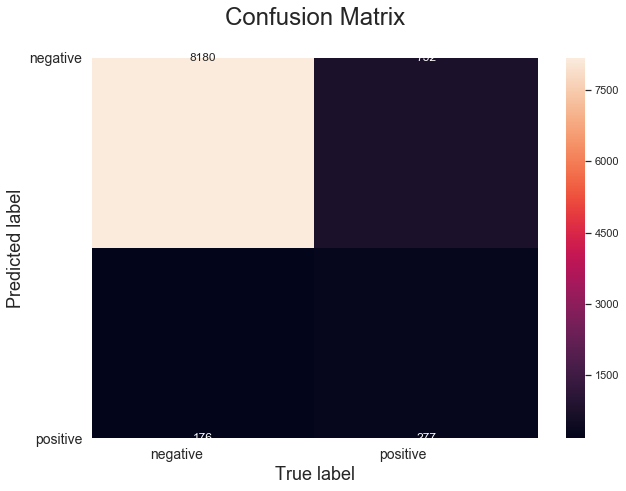

In [119]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA:

In [120]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

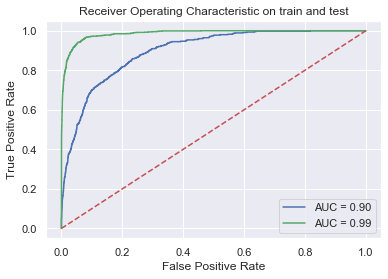

In [121]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# HYPERPARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATERS for XGBClassifier

In [122]:
#code for hyperparameter tuning
import numpy as np
hyper1 =  [5, 10, 50, 100, 200]
hyper2 =  [2, 4, 6, 8, 10,12]

auc1=np.empty((5,6))
auc2=np.empty((5,6))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = XGBClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

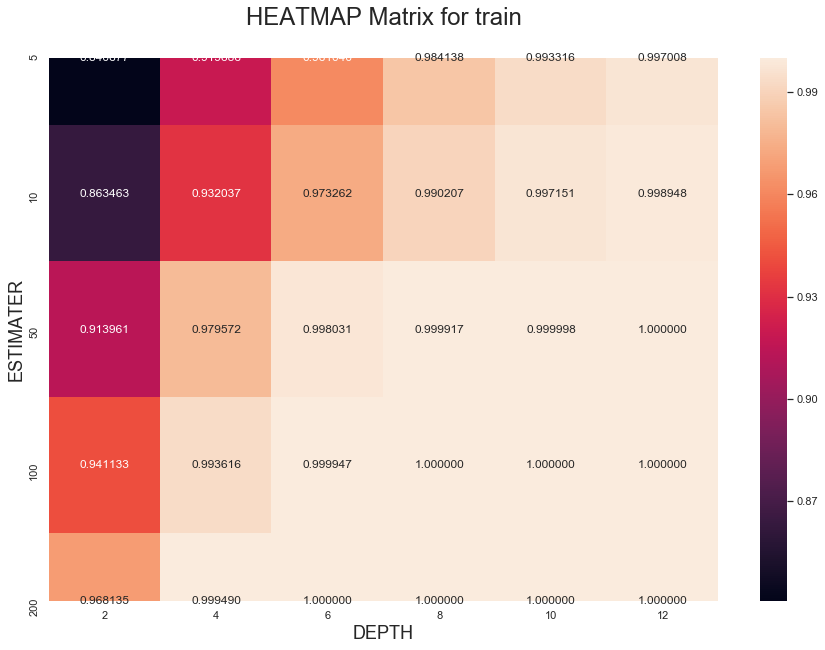

In [123]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

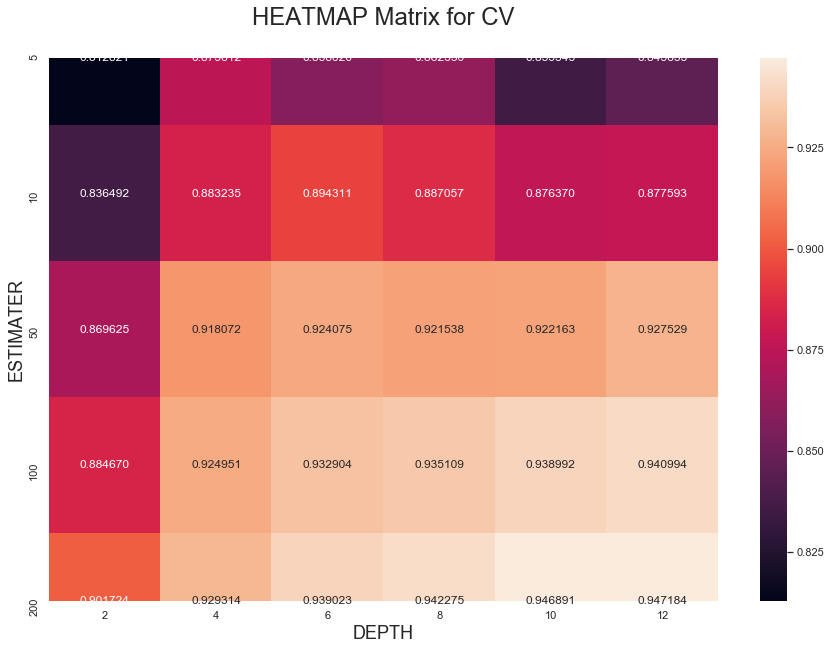

In [124]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [125]:
rf = RandomForestClassifier(n_estimators=100,max_depth=8)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

f1 = f1_score(y_test, pred)

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (100,5, acc))



print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,8,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,8,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,8,f1))



The accuracy of the Random forest classifier for n_estimaters=100.000000 and Depth = 5.000000 is 90.495471%

The precision_score of the  Random forest classifier  for n_estimaters=100 and Depth = 8 is 0.276249

The recall_score of the  Random forest classifier  for n_estimaters=100 and Depth = 8 is 0.598234

The f1_score of the  Random forest classifier  for n_estimaters=100 and Depth = 8 is 0.377964


# PLOTTING CONFUSION MATRIX:

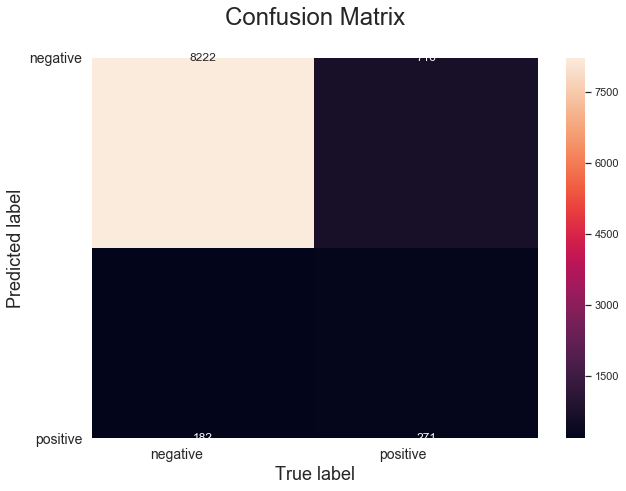

In [126]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA:

In [127]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

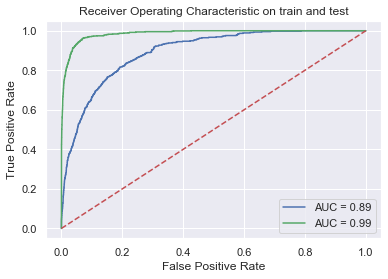

In [128]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PREETY_TABLE_OBSERVATION:

In [2]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Technique", "Model","DEPTH","ESTIMATER", "Precession","recall","F1","ACCURACY"]

x.add_row(["No_Sampling", "Random Forest",     10,  100,  0.970297,0.216336 ,           0.353791,96.185402])

x.add_row(["No_Sampling", "XGB_Regressor",      10,  150,  0.962617 ,0.227373 , 0.367857, 96.228023])

x.add_row(["SMOTE", "Random Forest",           5,   50,    0.970297,0.216336 ,           0.353791,96.185402])
   
x.add_row(["SMOTE", "XGB_Regressor",          10,   150,    0.962617,0.227373  ,           0.367857,96.228023])

x.add_row(["UP_SAMPLING", "Random Forest",    10,   100,   0.276249,0.598234  ,           0.377964,90.495471])

x.add_row(["UP_SAMPLING", "XGB_Regressor",   8,    100, 0.259450,0.666667  ,         0.373531,89.206180])


print(x)

+-------------+---------------+-------+-----------+------------+----------+----------+-----------+
|  Technique  |     Model     | DEPTH | ESTIMATER | Precession |  recall  |    F1    |  ACCURACY |
+-------------+---------------+-------+-----------+------------+----------+----------+-----------+
| No_Sampling | Random Forest |   10  |    100    |  0.970297  | 0.216336 | 0.353791 | 96.185402 |
| No_Sampling | XGB_Regressor |   10  |    150    |  0.962617  | 0.227373 | 0.367857 | 96.228023 |
|    SMOTE    | Random Forest |   5   |     50    |  0.970297  | 0.216336 | 0.353791 | 96.185402 |
|    SMOTE    | XGB_Regressor |   10  |    150    |  0.962617  | 0.227373 | 0.367857 | 96.228023 |
| UP_SAMPLING | Random Forest |   10  |    100    |  0.276249  | 0.598234 | 0.377964 | 90.495471 |
| UP_SAMPLING | XGB_Regressor |   8   |    100    |  0.25945   | 0.666667 | 0.373531 |  89.20618 |
+-------------+---------------+-------+-----------+------------+----------+----------+-----------+


# ---------------------SAVING_RESULT_WITHOUT_SAMPLING-----------------------

In [170]:
df_tr1=pd.read_csv('train.csv')
df_te1=pd.read_csv('test.csv')
yees=df_tr['target']
df_tr_after_drop=df_tr.drop(['target'],axis=1)



In [171]:
df_tr_after_drop.fillna(df_tr_after_drop.mean(), inplace=True)
df_te1.fillna(df_te1.mean(), inplace=True)


Xbow_tr_std = sc.fit_transform(df_tr_after_drop)
Xbow_test_std = sc.transform(df_te1)



In [173]:
rf = XGBClassifier(n_estimators=150,max_depth=10)

# fitting the model
rf.fit(Xbow_tr_std, yees)

# predict the response
pred = rf.predict(Xbow_test_std)

In [174]:
df_te['TARGET'] = pred
df_te.to_csv('test_with_target_finel1.csv', index=True)

# ------------------------------SAVING_RESULT_WITH_SMOTE------------------------------

In [175]:
X_tr, y_tr = sm.fit_sample(df_tr_after_drop, yees)
Xbow_tr_std = sc.fit_transform(X_tr)


In [176]:
rf = XGBClassifier(n_estimators=150,max_depth=10)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

In [177]:
df_te['TARGET'] = pred
df_te.to_csv('test_with_target_finel2.csv', index=True)

# ------SAVING_RESULT_WITH_OVERSAMPLING_MINORITY_CLASS---------

<class 'pandas.core.frame.DataFrame'>
29772 1511
29772 1511
Random over-sampling:
1    29772
0    29772
Name: target, dtype: int64


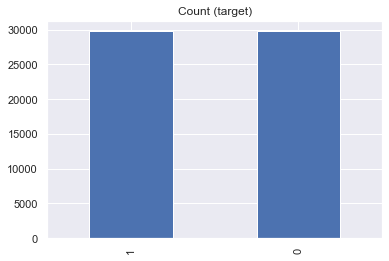

In [178]:
# Class count
X_tr = pd.DataFrame(df_tr1)
print(type(X_tr))
count_class_0, count_class_1 = X_tr.target.value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = X_tr[X_tr.target == 0]
df_class_1 = X_tr[X_tr.target == 1]
print(count_class_0, count_class_1)


df_class_1_over = df_class_1.sample(count_class_0, replace=True)
X_tr = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(X_tr.target.value_counts())

X_tr.target.value_counts().plot(kind='bar', title='Count (target)');



In [179]:
y_tr=X_tr['target']
X_tr=X_tr.drop(['target'],axis=1)

In [180]:
X_tr.fillna(X_tr.mean(), inplace=True)

Xbow_tr_std = sc.fit_transform(X_tr)

In [181]:
rf = XGBClassifier(n_estimators=100,max_depth=8)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

In [182]:
df_te['TARGET'] = pred
df_te.to_csv('test_with_target_finel3.csv', index=True)